# <center> Майнор "Интеллектуальный анализ данных" </center>

# <center> Курс "Прикладные задачи анализа данных" </center>

# <center> Рекомендательные системы </center>

# <center> Коллаборативная фильтрация </center>

## Table of contents  
  
1. []()
2. []()

## Данные MoveiLens

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
movies = pd.read_csv("ml-latest-small/movies.csv")
ratings = pd.read_csv("ml-latest-small/ratings.csv")

In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9742 entries, 0 to 9741
Data columns (total 3 columns):
movieId    9742 non-null int64
title      9742 non-null object
genres     9742 non-null object
dtypes: int64(1), object(2)
memory usage: 228.3+ KB


In [5]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4,964982703
1,1,3,4,964981247
2,1,6,4,964982224
3,1,47,5,964983815
4,1,50,5,964982931


In [6]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 4 columns):
userId       100836 non-null int64
movieId      100836 non-null int64
rating       100836 non-null float64
timestamp    100836 non-null int64
dtypes: float64(1), int64(3)
memory usage: 3.8 MB


In [7]:
ratings['movieId'].nunique()

9724

In [8]:
ratings['userId'].nunique()

610

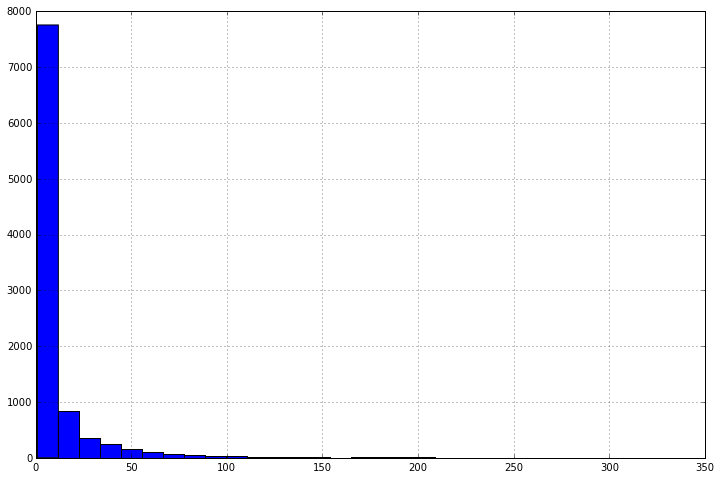

In [9]:
x = ratings['movieId'].value_counts()
x.hist(bins = 30, figsize=(12,8))

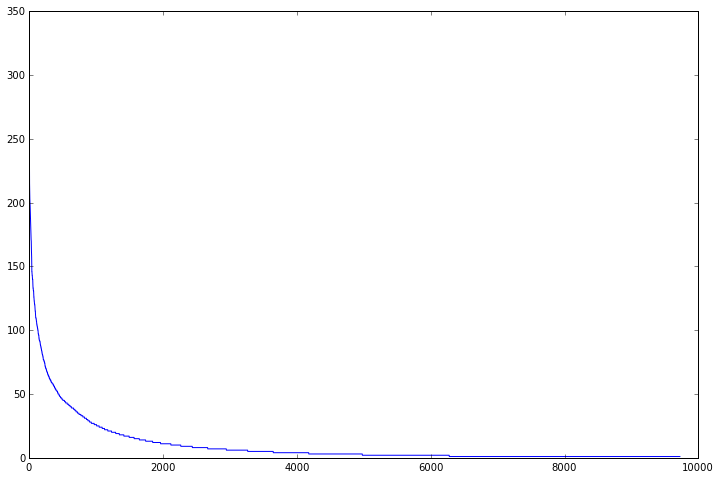

In [10]:
x.sort(ascending=False)

plt.figure(figsize=(12,8))
plt.plot(x)

In [11]:
x = x[x >= 100]
len(x)

138

In [12]:
ratings = ratings[ratings['movieId'].isin(x.index)]
ratings.shape

(20188, 4)

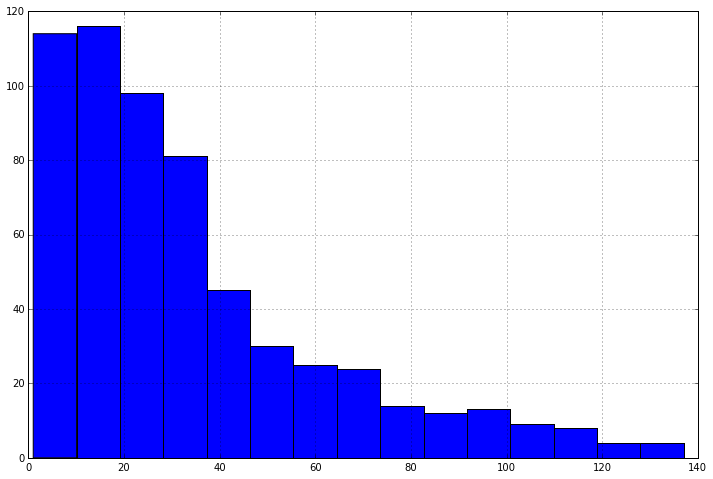

In [13]:
x = ratings['userId'].value_counts()
x.hist(bins = 15, figsize=(12,8))

In [14]:
x = x[x >= 10]
len(x)

494

In [15]:
ratings = ratings[ratings['userId'].isin(x.index)]
ratings.shape

(19651, 4)

In [16]:
ratings['rating'] = ratings['rating'].astype('int32')

In [17]:
df_user_item = ratings.pivot(
    index='userId',
    columns='movieId',
    values='rating'
).fillna(0)

df_user_item.shape

(494, 138)

In [18]:
from scipy.sparse import csr_matrix

In [19]:
mat_user_item = csr_matrix(df_user_item.values)

In [20]:
mat_user_item[1:5, 10:12]

<4x2 sparse matrix of type '<class 'numpy.float64'>'
	with 3 stored elements in Compressed Sparse Row format>

## User to user

### KNN

### Matrix Factorization

## Item to item

### KNN

### LDA

### Embeddings

* [Here](http://mccormickml.com/2018/06/15/applying-word2vec-to-recommenders-and-advertising/) - general approach  and several use cases  
* [Here](https://towardsdatascience.com/building-a-recommendation-system-using-neural-network-embeddings-1ef92e5c80c9) - example with code